In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np

In [165]:
products = pd.read_csv('./scrape/data/products.csv')

In [166]:
products.shape

(2071, 9)

In [168]:
products.groupby('category').count()

,name,brand,price,no_reviews,hearts,size1,url,ingredients
category,,,,,,,,
cleanser,362,362,362,362,362,362,362,362
eye-treatment-dark-circle-treatment,212,212,212,212,212,212,212,212
facial-treatments,575,575,575,575,575,575,575,575
lip-treatments,169,169,169,169,169,169,169,169
moisturizing-cream-oils-mists,481,481,481,481,481,481,481,481
skin-care-tools,100,100,100,100,100,100,100,100
sunscreen-sun-protection,172,172,172,172,172,172,172,172


In [169]:
products = products.drop_duplicates()

In [170]:
products.shape

(2069, 9)

# convert price to a float 

In [171]:
products.price = products.price.str.replace("$", "")

In [172]:
for i in products.index:
    products.loc[i, 'price'] =  products.price[i].split("(")[0]
    products.loc[i, "price"] =  products.price[i].split(" ")[0]
products.price = products.price.astype(float)

In [173]:
products[products.ingredients.isnull()]

,name,brand,category,price,no_reviews,hearts,size1,url,ingredients


# clean ingredients

In [222]:
data = products.copy()

In [223]:
start = '<br/><br/>'
end = '\n<br/><br/>'

In [224]:
data['ingredients'] = data.ingredients.str.extract(r'(?<={})(.*?)(?={})'.format(start, end), expand=False)

In [225]:
data[data.ingredients.isnull()]

,name,brand,category,price,no_reviews,hearts,size1,url,ingredients
1,The Dewy Skin Cream Plumping & Hydrating Moist...,Tatcha,moisturizing-cream-oils-mists,68.0,2K,163.6K,Size: 1.7 oz/ 50 mL,https://www.sephora.com/product/the-dewy-skin-...,NaN
3,The Water Cream Oil-Free Pore Minimizing Moist...,Tatcha,moisturizing-cream-oils-mists,68.0,3.6K,274.4K,Size: 1.7 oz/ 50 mL,https://www.sephora.com/product/the-water-crea...,NaN
6,Crème de la Mer Moisturizer,La Mer,moisturizing-cream-oils-mists,190.0,729,79.3K,Size: 1 oz/ 30 mL,https://www.sephora.com/product/creme-de-la-me...,NaN
8,Natural Moisturizing Factors + HA,The Ordinary,moisturizing-cream-oils-mists,5.8,1.3K,161.6K,Size: 1 oz/ 30 mL,https://www.sephora.com/product/the-ordinary-d...,NaN
9,CC+ Cream with SPF 50+,IT Cosmetics,moisturizing-cream-oils-mists,39.5,4K,271K,Color: Light - taupe shade with warm undertones,https://www.sephora.com/product/your-skin-but-...,NaN
...,...,...,...,...,...,...,...,...,...
2058,Volcano Lip Balm,Capri Blue,lip-treatments,10.0,7,1.1K,Size: 0.42 oz,https://www.sephora.com/product/capri-blue-vol...,NaN
2059,basic balm,lululemon selfcare,lip-treatments,14.0,29,2.6K,Size: 0.32 oz/ 9.5 mL,https://www.sephora.com/product/basic-balm-P44...,NaN
2062,Butterstick Lip Treatment,Kiehl's Since 1851,lip-treatments,24.0,21,6.3K,standard size,https://www.sephora.com/product/butterstick-li...,NaN
2064,Argan Lip Sting Plumping Butter,Josie Maran,lip-treatments,23.0,464,34.6K,Color: Free It - Grapefruit,https://www.sephora.com/product/argan-lip-stin...,NaN


In [226]:
cleaned_data = data[data.ingredients.notnull()]

In [228]:
cleaned_data.shape

(778, 9)

In [240]:
cleaned_data.loc[0,'ingredients']

'Water/Aqua/Eau, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, sh-Oligopeptide-1, sh-Oligopeptide-2, sh-Polypeptide-1, sh-Polypeptide-9, sh-Polypeptide-11, Copper Palmitoyl Heptapeptide-14, Heptapeptide-15 Palmitate, Palmitoyl Tetrapeptide-7, Palmitoyl Tripeptide-1, Alanine, Arginine, Glycine, Histidine, Isoleucine, Phenylalanine, Proline, Serine, Threonine, Valine, Acetyl Glutamine, Coconut Alkanes, Coco-Caprylate/Caprate, Sodium Hyaluronate, Aspartic Acid, Linoleic Acid, Linolenic Acid, Lecithin, Butylene Glycol, Polyvinyl Alcohol, Sodium Lactate, Sodium PCA, PCA, Sorbitan Isostearate, Carbomer, Polysorbate 20, Polysorbate 60, Lactic Acid/Glycolic Acid Copolymer, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Xanthan Gum, Isomalt, 1,2-Hexanediol, Caprylyl Glycol, Chlorphenesin, Phenoxyethanol, Tocopherol, Sodium Benzoate, Phe

In [229]:
data2 = products.copy()

In [230]:
s = '<div>'
e = '.<br/>'

In [231]:
data2['ingredients'] = data2.ingredients.str.extract(r'(?<={})(.*?)(?={})'.format(s, e), expand=False)

In [255]:
nulldata = data[data.ingredients.isnull()]

In [300]:
import re

text = products.loc[103,'ingredients']

m = re.search('<br/><br/>(.+?).</div></div>', text)
if m:
    found = m.group(1)

In [290]:
data2[data2.name.isin(nulldata.name)].loc[98:]

,name,brand,category,price,no_reviews,hearts,size1,url,ingredients
98,Vitamin C+ Collagen Deep Cream,Dr. Dennis Gross Skincare,moisturizing-cream-oils-mists,72.0,243,13.5K,Size: 1.7 oz/ 50 g,https://www.sephora.com/product/c-collagen-dee...,"Water, Glycerin, Butylene Glycol, Camellia Jap..."
102,Benefiance Wrinkle Smoothing Day Cream SPF 23,Shiseido,moisturizing-cream-oils-mists,70.0,178,11K,Size: 1.7 oz/ 50 mL,https://www.sephora.com/product/benefiance-wri...,-ReNeura Technology+™: Helps improve skin rec...
103,Benefiance Wrinkle Smoothing Cream Enriched,Shiseido,moisturizing-cream-oils-mists,70.0,149,4.8K,Size: 1.7 oz/ 50 mL,https://www.sephora.com/product/benefiance-wri...,-ReNeura Technology+™: Helps improve skin rec...
106,Maracuja Hydrating Tinted Moisturizer,tarte,moisturizing-cream-oils-mists,29.0,191,28.5K,Color: 34N medium neutral - medium skin with n...,https://www.sephora.com/product/tarte-maracuja...,"-Hyaluronic Acid: Delivers moisture, visible ..."
107,Vinosource SOS Intense Hydration Moisturizer,Caudalie,moisturizing-cream-oils-mists,42.0,353,21.5K,Size: 1.6 oz/ 50 mL,https://www.sephora.com/product/vinosource-sos...,NaN
...,...,...,...,...,...,...,...,...,...
2058,Volcano Lip Balm,Capri Blue,lip-treatments,10.0,7,1.1K,Size: 0.42 oz,https://www.sephora.com/product/capri-blue-vol...,Helianthus Annuus (Sunflower) Seed Oil Olea Eu...
2059,basic balm,lululemon selfcare,lip-treatments,14.0,29,2.6K,Size: 0.32 oz/ 9.5 mL,https://www.sephora.com/product/basic-balm-P44...,"-Shea Butter: With vitamins A, E, and F, work..."
2062,Butterstick Lip Treatment,Kiehl's Since 1851,lip-treatments,24.0,21,6.3K,standard size,https://www.sephora.com/product/butterstick-li...,NaN
2064,Argan Lip Sting Plumping Butter,Josie Maran,lip-treatments,23.0,464,34.6K,Color: Free It - Grapefruit,https://www.sephora.com/product/argan-lip-stin...,NaN


In [ ]:
def get_string(x):
    text = products.loc[103,'ingredients']

m = re.search('<br/><br/>(.+?).</div></div>', text)
if m:
    found = m.group(1)

In [530]:
df = products.copy()

In [531]:
df['list_of_ingredients'] = ""

In [532]:
for i in df['ingredients']:
    text = str(i)
    m = re.search('<br/><br/>(.+?).</div></div>', text)
    if m: 
        string = m.group(1)
    df['list_of_ingredients'] = string

In [533]:
df['list_of_ingredients'] = df.ingredients.str.extract(r'<br/><br/>\s*([^\.]*)\s*\.', expand=False)

In [536]:
df.loc[df['name'] == 'The Dewy Skin Cream Plumping & Hydrating Moisturizer', 'list_of_ingredients'] = df.ingredients.str.extract(r'<div>\s*([^\.]*)\s*\.', expand=False)

In [537]:
df.loc[df['name'] == 'Benefiance Wrinkle Smoothing Cream Enriched', 'list_of_ingredients'] = re.search('<br/><br/>(.*)."', df.loc[103,'ingredients']).group(1).split(s,1)[0]

In [538]:
df[df.list_of_ingredients.isnull()].shape

(311, 10)

In [539]:
null = df[df.list_of_ingredients.isnull()]

In [540]:
null['list_of_ingredients'] = null.ingredients.str.extract(r'\n<br/>\n<br/>\s*([^\.]*)\s*\.', expand=False)

<ipython-input-540-6524268a5ec8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null['list_of_ingredients'] = null.ingredients.str.extract(r'\n<br/>\n<br/>\s*([^\.]*)\s*\.', expand=False)


In [544]:
df.list_of_ingredients.fillna(null.list_of_ingredients, inplace=True)

In [555]:
null2= df[df.list_of_ingredients.isnull()]

In [563]:
null2.loc[45,'list_of_ingredients']

'Rubus Idaeus (Cold Pressed Red Raspberry) Seed Oil, Neopentyl Glycol Diethylhexanoate, Caprylyl Caprylate/Caprate, Simmondsia Chineses (Jojoba) Seed Oil, Vaccinium Macrocarpon (Cold Pressed Cranberry) Seed Oil, Punica Granatum (Cold Pressed Pomegranate) Seed Oil, Cucumis Sativus (Cucumber) Seed Oil, Oenothera Biennis (Evening Primrose) Seed, Tetrahexyldecyl Ascorbate, Octyldodecanol, Curcuma Longa (Turmeric) Root Extract, Helianthus Annuus (Sunflower) Seed Oil Unsaponifiables, Citrus Aurantium Amara (Bitter Orange) Flower Oil, Eclipta Prostrata Extract, Melia Azadirachta Leaf Extract, Moringa Oleifera Seed Oil, Tocopherol, Helianthus Annuus (Sunflower) Seed Oil, Pentylene Glycol, 4-t-Butylcyclohexanol, Ribes Nigrum (Black Current) Seed Oil, Bisabolol, Cetylhydroxyproline Palmitamide, Hexyldecanol, Hydroxyphenyl Propamidobenzoic Acid, Stearic Acid, Brassica Campestris (Rapeseed) Sterols, Cardiospermum Halicacabum Flower/ Leaf/ Vine Extract, Zingiber Officinale, Rosemarinus Officinalis 

In [561]:
null2['list_of_ingredients'] = null2.ingredients.str.extract(r'<div>\s*([^\.]*)\s*\.', expand=False)

<ipython-input-561-1bd46fd5eff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null2['list_of_ingredients'] = null2.ingredients.str.extract(r'<div>\s*([^\.]*)\s*\.', expand=False)


In [565]:
df.list_of_ingredients.fillna(null2.list_of_ingredients, inplace=True)

In [567]:
null3 = df[df.list_of_ingredients.isnull()]

In [1054]:
cleaned_data = df.copy()

In [1055]:
for i in cleaned_data.index:
    #remove anything between parethesis and parenthesis
    new_string = re.sub(r'\([^)]*\)', '', cleaned_data.loc[i, 'ingredients'])
    #remove anything between <> and <>
    new_string= re.sub(r'\<[^)]*\>', '', new_string)
    #remove anything betwee [] and []
    new_string= re.sub(r'\[[^)]*\]', '', new_string)
    products.loc[i, 'ingredients'] = new_string.replace('  ', ' ')
    
cleaned_data['list_of_ingredients'] = cleaned_data['list_of_ingredients'].str.replace('<', "")
cleaned_data['list_of_ingredients'] = cleaned_data['list_of_ingredients'].str.replace(']', "")
cleaned_data['list_of_ingredients'] = cleaned_data['list_of_ingredients'].str.replace(')', "")

# clean number of reviews

In [1056]:
cleaned_data['no_reviews'].replace({"Write a review": 0}, inplace = True)

In [1057]:
#converting # reviews to integer
cleaned_data['no_reviews'] = cleaned_data['no_reviews'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [1058]:
cleaned_data['hearts'] = cleaned_data['hearts'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

# retrieve ml from size and remove unnecessary comments

In [1059]:
def sizess(x):
    if x.startswith('Size:'):
        return x
    else: return 0 

In [1060]:
cleaned_data['size1'] = cleaned_data['size1'].apply(sizess)

In [1061]:
for i in cleaned_data.index:
    text = str(cleaned_data['size1'][i])
    substring = '/'
    if text.find(substring) != -1:
        cleaned_data.loc[i,'size1'] = cleaned_data.size1[i].split("/")[1]
    else: 
         cleaned_data.loc[i,'size1'] = 0  

In [1062]:
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" - Sheer pink balm to your perfect pink glow", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" fl oz\t\t\t\t\t\t", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" pre-saturated chemical peel pads", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" Mild", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" fl oz", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" - clear", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" each", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(")", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" Vials", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" Refill", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace(" packets", '')
cleaned_data.loc[:, 'size1'] = cleaned_data.loc[:, 'size1'].str.replace("2 x ", '')

In [1064]:
cleaned_data['size1'] = cleaned_data['size1'].fillna(0)

In [1078]:
for i in cleaned_data.index:
    text = str(cleaned_data['size1'][i])
    substring = 'mL'
    if text.find(substring) != -1:
        cleaned_data.loc[i,'size1'] = cleaned_data.size1[i].replace("mL", '')
    else: 
        pass 

In [1093]:
cleaned = cleaned_data[~cleaned_data['size1'].str.contains('g', na=False)]

In [1095]:
cleaned = cleaned[~cleaned['size1'].str.contains('Patches', na=False)]

In [1097]:
cleaned = cleaned[~cleaned['size1'].str.contains('patches', na=False)]

In [1099]:
cleaned = cleaned[~cleaned['size1'].str.contains('spfL', na=False)]

In [1104]:
cleaned['size1'] = cleaned['size1'].astype(float)

In [1106]:
cleaned.loc[:, 'price_per_ml'] = cleaned['price'] / cleaned['size1']

In [1108]:
cleaned.to_csv('sephora_cleaned_data.csv')

# Bunch of graphs 

In [1122]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1113]:
cleaned['price_per_ml'] = cleaned['price_per_ml'].fillna(0)

In [1120]:
cleaned['price_per_ml'].replace(np.inf, 0, inplace=True)

/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


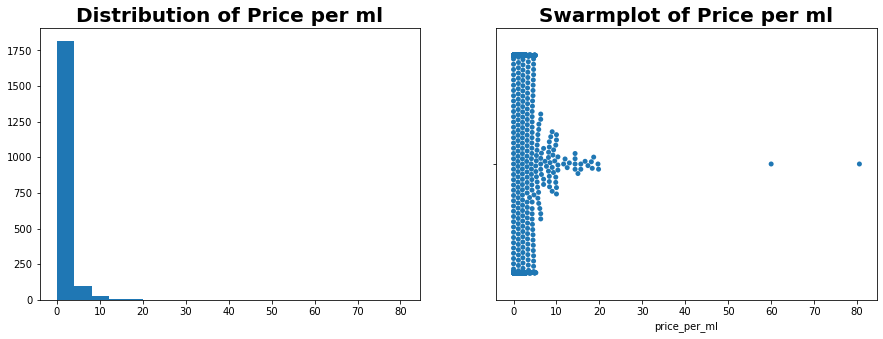

In [1124]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(cleaned['price_per_ml'], bins = 20)
ax[0].set_title('Distribution of Price per ml', weight = 'bold', fontsize = 20)
sns.swarmplot(cleaned['price_per_ml'], ax = ax[1]);
ax[1].set_title('Swarmplot of Price per ml', weight = 'bold', fontsize = 20);

/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seabor

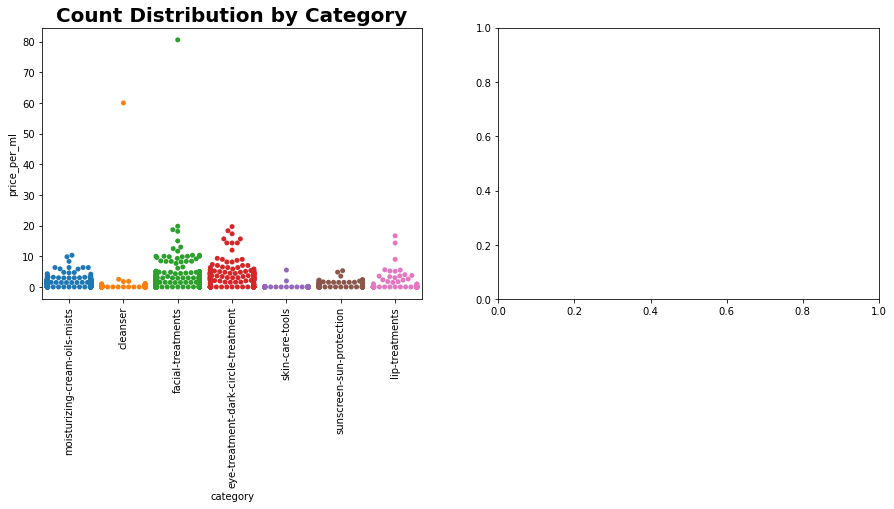

In [1451]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.swarmplot(x="category", y="price_per_ml", data=cleaned, ax = ax[0])
ax[0].set_title('Count Distribution by Category', weight = 'bold', fontsize = 20)

for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

/Users/anun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Divided by Category')

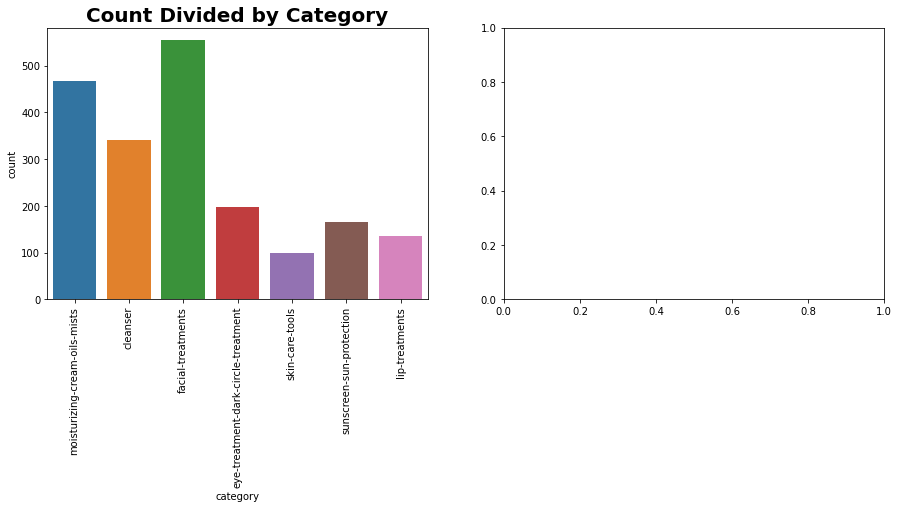

In [1454]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(cleaned['category'], ax = ax[0])
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
ax[0].set_title('Count Divided by Category', weight = 'bold', fontsize = 20)

In [1131]:
from scipy import stats

In [1762]:
try_data = cleaned.copy()

In [1763]:
try_data.shape

(1960, 11)

# fix ingredients

In [1764]:
try_data.loc[try_data['name'] == 'The Moisturizing Soft Cream Moisturizer', 'list_of_ingredients'] = try_data['list_of_ingredients'].replace('Please be aware that ingredient lists may change or vary from time to time', "Algae (Seaweed) Extract , Cyclopentasiloxane , Petrolatum , Glyceryl Distearate , Phenyl Trimethicone , Butylene Glycol , Hydrogenated Vegetable Oil , Cholesterol , Butyrospermum Parkii (Shea Butter) , Steareth-10 , Dimethicone , Glyceryl Stearate Se , Polysilicone-11 , Sesamum Indicum (Sesame) Seed Oil , Medicago Sativa (Alfalfa) Seed Powder , Helianthus Annuus (Sunflower) Seedcake , Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal , Eucalyptus Globulus (Eucalyptus) Leaf Oil , Sodium Gluconate , Copper Gluconate , Calcium Gluconate , Magnesium Gluconate , Zinc Gluconate , Tocopheryl Succinate , Niacin , Sesamum Indicum (Sesame) Seed Powder , Water\Aqua\Eau , Citrus Aurantifolia (Lime) Peel Extract , Laminaria Digitata Extract , Crithmum Maritimum Extract , Salicornia Herbacea Extract , Plankton Extract , Chlorella Vulgaris Extract , Glycine Soja (Soybean) Seed Extract , Glycerin , Caffeine , Sea Salt\Maris Sal\Sel Marin , Micrococcus Lysate , Diethylhexyl Succinate , Adenosine Phosphate , Creatine , Hydrolyzed Algin , Isocetyl Stearoyl Stearate , Cetyl Alcohol , Sucrose , Acetyl Hexapeptide-8 , Glucose Oxidase , Polyacrylamide , Acetyl Carnitine Hcl , Glucose , Caprylic/Capric Triglyceride , C13-14 Isoparaffin , Tocopheryl Acetate , Tetrahexyldecyl Ascorbate , Sodium Pca , Glycosaminoglycans , Urea , Distearyldimonium Chloride , Dipalmitoyl Hydroxyproline , Sodium Hyaluronate , Laureth-7 , Lecithin , Trehalose , Polyquaternium-51 , Lactoperoxidase , Hydroxypropyl Cyclodextrin , Cyanocobalamin , Pentylene Glycol , Fragrance (Parfum) , Disodium Edta , Bht , Citronellol , Hydroxycitronellal , Geraniol , Linalool , Limonene , Potassium Sorbate , Phenoxyethanol")

In [1765]:
try_data.loc[try_data['name'] == 'Sens’Eyes - Waterproof Sensitive Eye Cleanser', 'list_of_ingredients'] = try_data['list_of_ingredients'].replace("To care for false lashes:\nbr/>-Soak a mascara wand in Sens' Eyes and comb through your natural or synthetic lash to remove and clean excess glue, mascara, or eyeliner","Water, Isododecane, Methylpropanediol, Pentylene Glycol, Acrylates Copolymer, Tromethamine, Butylene Glycol, Glycerin, Caprylyl Glycol, Sodium Dehydroacetate, Disodium Edta, Panthenol, Mel Extract (Honey Extract), Sodium Lauryl Sulfate, Urea, Gossypium Herbaceum (Cotton) Flower Extract, Ci 42090 (Blue 1), Fructose, Glucose, Inositol, Sucrose, Trehalose, Arginine Hcl, Lysine Hcl, Ornithine Hcl, Sodium Lactate, Sodium Citrate.")

In [1766]:
try_data.loc[try_data['name'] == 'The Renewal Oil','list_of_ingredients'] = try_data['list_of_ingredients'].replace('Please be aware that ingredient lists may change or vary from time to time',"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethicone, Caprylic/Capric Triglyceride, Water, Trisiloxane, Prunus Amygdalus Dulcis (Sweet Almond) Oil, Simmondsia Chinensis (Jojoba) Seed Oil, Polydecene, Hydrogenated Polydecene, Butylene Glycol, Propanediol, Glycerin, Algae (Seaweed) Extract, Brassica Campestris (Rapeseed) Seed Oil, Helianthus Annuus (Sunflower) Seed Oil, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Camelina Sativa Seed Oil, Oxycoccus Palustris (Cranberry) Seed Oil, Olea Europaea (Olive) Fruit Oil, Hippophae Rhamnoides Oil, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Tocopheryl Succinate, Niacin, Sesamum Indicum (Sesame) Seed Powder, Laminaria Ochroleuca Extract, Laminaria Saccharina Extract, Hydrolyzed Algin, Sea Salt/Maris Sal/Sel Marin, Chlorella Vulgaris Extract, Salicornia Herbacea Extract, Sigesbeckia Orientalis Extract, Laminaria Digitata Extract, Rosmarinus Officinalis (Rosemary) Leaf Extract, Magnolia Officinalis Bark Extract, Yeast Extract/Faex/Extrait De Levure, Crithmum Maritimum Extract, Commiphora Mukul Resin Extract, Citrus Aurantifolia (Lime) Peel Extract, Molasses Extract/Saccharum Officinarum/Extrait De Melasse, Sucrose, Acetyl Hexapeptide-8, Acetyl Glucosamine, Caffeine, Tocopheryl Acetate, Phenyl Trimethicone, Sodium Chloride, Tetrahexyldecyl Ascorbate, Alcohol Denat., Fragrance, Hexyl Cinnamal, Linalool, Amyl Cinnamal, Geraniol, Limonene, Citral, Benzyl Benzoate, Coumarin, Citronellol, Bht, Phenoxyethanol, Yellow 5 (Ci 19140), Yellow 6 (Ci 15985)")

In [1767]:
try_data.loc[try_data['name'] == 'Crème de la Mer Moisturizer', 'list_of_ingredients'] = try_data['list_of_ingredients'].replace('Please be aware that ingredient lists may change or vary from time to time', "Algae (Seaweed) Extract, Mineral Oil\Paraffinum Liquidum\Huile Minerale, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax\Cera Microcristallina\Cire Microcristalline, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Ecalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Potassium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water\Aqua\EAU, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat, Fragrance (Parfum)")

In [1768]:
#1,2 hexanediol shows up in multiple formats. vectorizes as different ingredients
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('1,10Decanediol', "110Decanediol")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('1,2 Hexanedio', "12Hexanediol")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('1,2 Hexanediol', "12Hexanediol")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('1,2Hexanediol', "12Hexanediol")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('12HexanediolQuaternium18 Bentonite', "12Hexanediol, Quaternium18 Bentonite")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('1, 2Hexanediol', "12Hexanediol")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('12Hexanedioll', "12Hexanediol")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('4t butylcyclohexanol', "4tbutylcyclohexanol")

In [1769]:
#removing all the instances of 100% natural, 100% organic and the like
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('100% Natural ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('100% Organic ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('100percent Natural ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('100% Unrefined ', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('100% Pure ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('100% ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('All Natural ', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('Organic ', "")

In [1770]:
water = ['Water, ', 'Water/Aqua/Eau, ', 'Aqua/Water, ', 'Aqua (Water), ', 'Water , ', 'Aqua/Water/Eau, ',
        'Water (Aqua, Eau), ', 'Water/Aqua/Eau (Aqua), ', ' Water, ', 'Water/Eau, ', 'Water (Aqua / Eau), ',
        'ater/Aqua/Eau, ', 'Water/Eau/Aqua, ', 'Aqua, ', 'Water/Aqua/Eau ', 'Aqua ']

for i in range(len(water)):
    try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace(water[i], "")

In [1771]:
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('-', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('*', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('+', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('.', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('^', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('\r', "")
try_data['list_of_ingredients']= try_data['list_of_ingredients'].str.replace('May contain: ', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace(';', ",")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('\u200b', "")


In [1772]:
try_data = try_data[try_data['list_of_ingredients'].notnull()]

In [1773]:
try_data.shape

(1897, 11)

In [1774]:
for i in try_data.index:
    new_string = re.sub(r'\([^)]*\)', '', try_data.loc[i, 'list_of_ingredients'])
    new_string= re.sub(r'\<[^)]*\>', '', new_string)
    new_string= re.sub(r'\[[^)]*\]', '', new_string)
    try_data.loc[i, 'list_of_ingredients'] = new_string.replace('  ', ' ')
    
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('<', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace(']', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace(')', "")
try_data['list_of_ingredients'] = try_data['list_of_ingredients'].str.replace('(', "")

In [1775]:
for i in try_data.index:
    list_of_ingredients = []
    split = try_data.list_of_ingredients[i].split(", ")
    for j in range(len(split)):
        results = split[j].split("/")[0]
        results = results.strip() #stripping any white space 
        list_of_ingredients.append(results)
    try_data.loc[i, 'list_of_ingredients'] = ', '.join(list_of_ingredients)

In [1776]:
for i in try_data.index:
    list_of_ingredients = []
    split = try_data.list_of_ingredients[i].split(", ")
    for j in range(len(split)):
        results = split[j].split("\\")[0]
        results = results.strip() #stripping any white space 
        list_of_ingredients.append(results)
    try_data.loc[i, 'list_of_ingredients'] = ', '.join(list_of_ingredients)

In [1777]:
try_data.loc[10,'list_of_ingredients']

'Aqua, Cyclohexasiloxane, Squalane, BisPEG18 Methyl Ether Dimethyl Silane, Sucrose Stearate, Stearyl Alcohol, PEG8 Stearate, Myristyl Myristate, Pentaerythrityl Tetraethlhexanoate, Prunus Armeniaca Kernal Oil, Phenoxyethanol, Persea Gratissima Oil, Glyceryl Stearate, Cetl Alcohol, Oryza Sativa Bran Oil, Olea Europaea Fruit Oil, Chlorphenesin, Stearic Acid, Palmitic Acid, Disodium EDTA, Acrylates, Carbomer, Prunus Amygdalus Dulcis Oil, Xanthan Gum, Ethylhexylglycerin, Sodium Hydroxide, Tocopherol, Glycine Soja Oil, Pseudoalteromonas Ferment Extract, Myristic acid, Hydroxypalmitol Sphinganine, BHT, Salicylic Acid, Citric Acid'

In [1778]:
try_data.category.unique()

array(['moisturizing-cream-oils-mists', 'cleanser', 'facial-treatments',
       'eye-treatment-dark-circle-treatment', 'skin-care-tools',
       'sunscreen-sun-protection', 'lip-treatments'], dtype=object)

# try a recommendation on moisturizing-cream-oils-mists ingredients

In [1779]:
# Filter the data by the given options
try_data = try_data[try_data['category'] == 'moisturizing-cream-oils-mists']
try_data = try_data.reset_index()

In [1780]:
# Tokenization
ingredient_lists = {}
data = []
lists = 0 

# ingredients, products (matrix)

In [1781]:
for i in range(len(try_data)):    
    ingredients = try_data['list_of_ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    data.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_lists:
            ingredient_lists[ingredient] = lists
            lists += 1

In [1782]:
# Get the number of items and tokens 
M = len(try_data)                 # The number of the items
N = len(ingredient_lists)     # The number of the ingredients

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [1783]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)    
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_lists[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [1784]:
i = 0
for tokens in data:
    A[i, :] = oh_encoder(tokens)
    i += 1

In [1810]:
A.shape

(463, 2578)

In [1785]:
from sklearn.manifold import TSNE

In [1786]:
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 200)
tsne_features = model.fit_transform(A)

# Make X, Y columns 
try_data['X'] = tsne_features[:, 0]
try_data['Y'] = tsne_features[:, 1]

In [1787]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

In [1788]:
# Make a source and a scatter plot  
source = ColumnDataSource(try_data)
plot = figure(x_axis_label = 'T-SNE 1',
              y_axis_label = 'T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', y = 'Y', source = source, 
            size = 10, color = '#FF7373', alpha = .8)
plot.background_fill_color = "beige"
plot.background_fill_alpha = 0.2
# Add hover tool
hover = HoverTool(tooltips = [
        ('Item', '@name'),
        ('brand', '@brand'),
        ('Price', '$ @price')])
plot.add_tools(hover)

In [1789]:
option_1 = try_data.category.unique()

In [1790]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook

In [1791]:
def update(op1 = option_1[0]):
    a_b = op1
    new_data = {
        'X' : try_data[try_data['category'] == a_b]['X'],
        'Y' : try_data[try_data['category'] == a_b]['Y'],
        'name' : try_data[try_data['category'] == a_b]['name'],
        'brand' : try_data[try_data['category'] == a_b]['brand'],
        'price' : try_data[try_data['category'] == a_b]['price'],
    }
    source.data = new_data
    push_notebook()
# interact the plot with callback 
interact(update, op1 = option_1)
show(plot, notebook_handle = True)

/Users/anun/opt/anaconda3/lib/python3.8/site-packages/bokeh/io/notebook.py:252: UserWarning: Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()
  warn("Cannot find a last shown plot to update. Call output_notebook() and show(..., notebook_handle=True) before push_notebook()")


In [1792]:
df_2 = try_data[try_data.category == 'moisturizing-cream-oils-mists'].reset_index().drop('index', axis = 1)
df_2['dist'] = 0.0

In [1794]:
df_2[df_2['brand'] == "Paula's Choice"]

,level_0,name,brand,category,price,no_reviews,hearts,size1,url,ingredients,list_of_ingredients,price_per_ml,X,Y,dist
450,450,Water-Infusing Electrolyte Moisturizer,Paula's Choice,moisturizing-cream-oils-mists,35.0,4,503,50.0,https://www.sephora.com/product/paula-s-choice...,"[<div class=""css-1ue8dmw eanm77i0"" data-comp=""...","Water Glycerin, Dimethicone, Butylene Glycol, ...",0.700000,1.539320,-6.105567,0.0
460,460,CLEAR Oil-Free Moisturizer,Paula's Choice,moisturizing-cream-oils-mists,29.0,2,229,60.0,https://www.sephora.com/product/paula-s-choice...,"[<div class=""css-1ue8dmw eanm77i0"" data-comp=""...","Water Ethyl Macadamiate, Glycerin, Cetearyl Al...",0.483333,-1.482490,1.126342,0.0
461,461,RESIST Anti-Aging Clear Skin Hydrator,Paula's Choice,moisturizing-cream-oils-mists,33.0,1,169,60.0,https://www.sephora.com/product/paula-s-choice...,"[<div class=""css-1ue8dmw eanm77i0"" data-comp=""...","Water Cyclopentasiloxane, Octyldodecyl Neopent...",0.550000,7.384267,3.383341,0.0
462,462,RESIST Barrier Repair Moisturizer with Retinol,Paula's Choice,moisturizing-cream-oils-mists,33.0,2,389,50.0,https://www.sephora.com/product/paula-s-choice...,"[<div class=""css-1ue8dmw eanm77i0"" data-comp=""...","Water Dicaprylyl Carbonate, Glycerin, Ethylhex...",0.660000,6.041006,0.696939,0.0


In [1795]:
myProduct = df_2[df_2.name.str.contains('RESIST Anti-Aging Clear Skin Hydrator')]

In [1797]:
P1 = np.array([myProduct.X.values, myProduct.Y.values]).reshape(1, -1)

In [1798]:
for i in range(len(df_2)):
    P2 = np.array([df_2['X'][i], df_2['Y'][i]]).reshape(-1, 1)
    df_2.dist[i] = ((P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2))))

<ipython-input-1798-9e043d94f5b0>:3: RuntimeWarning: invalid value encountered in sqrt
  df_2.dist[i] = ((P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2))))
<ipython-input-1798-9e043d94f5b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dist[i] = ((P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2))))


# Top 5 products

In [1799]:
df_2 = df_2.sort_values('dist')
df_2[['name', 'brand', 'dist']].head(5)

,name,brand,dist
117,Juno Antioxidant + Superfood Face Oil,SUNDAY RILEY,1.266378
164,First Care Activating Serum Mist,Sulwhasoo,1.589672
338,Glow Body Cream,SEPHORA COLLECTION,1.694094
405,Mini Beauty Oil,rms beauty,2.448151
69,Beauty Elixir,Caudalie,2.495441
